In [1]:
# Section 1: Import Libraries and Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
try:
    df = pd.read_csv('Mall_Customers.csv')
    print("Dataset loaded successfully!")
    print("First 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'Mall_Customers.csv' not found.")
    print("Please make sure the dataset file is in the same directory as your script.")

Dataset loaded successfully!
First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
# Section 2: Comprehensive Data Diagnosis

print("\n" + "="*50)
print(" " * 15, "DATA DIAGNOSIS REPORT")
print("="*50 + "\n")

# 1. Shape of the dataset (rows, columns)
print("1. Dataset Shape:")
print(f"   Customers: {df.shape[0]}, Features: {df.shape[1]}\n")

# 2. Data types and non-null counts
print("2. Data Types and Non-Null Counts:")
df.info()

# 3. Explicit count of missing values per column
print("\n3. Missing Values Count per Column:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("   No missing values found in the dataset.")
else:
    print(missing_values[missing_values > 0])

# 4. Statistical summary for numerical columns
print("\n4. Statistical Summary for Numerical Columns:")
# Note the different scales between 'Annual Income' and 'Spending Score'
print(df.describe())

# 5. Check for duplicate customers
duplicate_rows = df.duplicated().sum()
print(f"\n5. Number of Duplicate Rows: {duplicate_rows}")


print("\n" + "="*50)
print(" " * 12, "END OF DIAGNOSIS REPORT")
print("="*50 + "\n")


                DATA DIAGNOSIS REPORT

1. Dataset Shape:
   Customers: 200, Features: 5

2. Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

3. Missing Values Count per Column:
   No missing values found in the dataset.

4. Statistical Summary for Numerical Columns:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     

In [3]:
# Section 3: Feature Selection and Scaling

from sklearn.preprocessing import StandardScaler

print("\n" + "="*50)
print(" " * 8, "FEATURE SELECTION & SCALING")
print("="*50 + "\n")

# 1. Select the relevant features for clustering
# As per the task description, we only need income and spending score.
features_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("Step 1: Selected the 'Annual Income' and 'Spending Score' features.\n")
print("Original data (first 5 rows):")
print(features_df.head())

# 2. Scale the features
# StandardScaler transforms the data to have a mean of 0 and a standard deviation of 1.
# This is essential for distance-based algorithms like K-Means.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# For better readability, let's convert the scaled numpy array back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features_df.columns)

print("\nStep 2: Applied StandardScaler to the features.\n")
print("Scaled data (first 5 rows):")
print(scaled_df.head())


print("\n" + "="*50)
print(" " * 12, "PREPROCESSING COMPLETE")
print("="*50 + "\n")


         FEATURE SELECTION & SCALING

Step 1: Selected the 'Annual Income' and 'Spending Score' features.

Original data (first 5 rows):
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

Step 2: Applied StandardScaler to the features.

Scaled data (first 5 rows):
   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980

             PREPROCESSING COMPLETE




      DETERMINING OPTIMAL NUMBER OF CLUSTERS

Running K-Means for k=1 through 10...
  - Inertia for k=1: 400.00
  - Inertia for k=2: 273.67
  - Inertia for k=3: 157.70
  - Inertia for k=4: 109.23
  - Inertia for k=5: 65.57
  - Inertia for k=6: 60.13
  - Inertia for k=7: 49.67
  - Inertia for k=8: 37.32
  - Inertia for k=9: 32.50
  - Inertia for k=10: 30.06

Generating the Elbow Method plot...


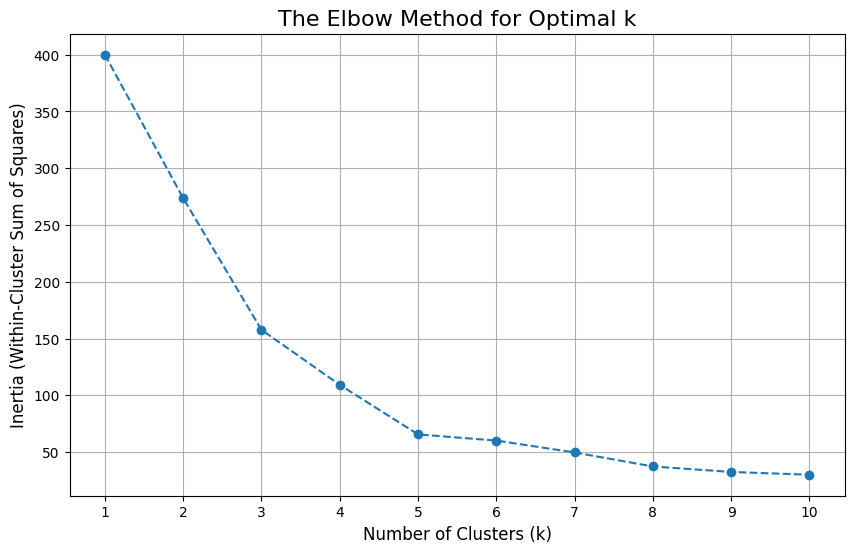


                ANALYSIS COMPLETE



In [4]:
# Section 4: Determining Optimal Clusters with the Elbow Method

from sklearn.cluster import KMeans

print("\n" + "="*50)
print(" " * 5, "DETERMINING OPTIMAL NUMBER OF CLUSTERS")
print("="*50 + "\n")

# We will use the scaled data from the previous step (scaled_df)
inertia_values = []
k_range = range(1, 11) # We will test k from 1 to 10

print("Running K-Means for k=1 through 10...")

for k in k_range:
    # Initialize KMeans
    # n_init='auto' is the modern default to avoid a FutureWarning.
    # random_state ensures our results are reproducible.
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    
    # Fit the model to our scaled data
    kmeans.fit(scaled_df)
    
    # Append the inertia (WCSS) to our list
    inertia_values.append(kmeans.inertia_)
    print(f"  - Inertia for k={k}: {kmeans.inertia_:.2f}")

# 2. Plot the Elbow Method graph
print("\nGenerating the Elbow Method plot...")
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.title('The Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()


print("\n" + "="*50)
print(" " * 15, "ANALYSIS COMPLETE")
print("="*50 + "\n")


         FINAL K-MEANS CLUSTERING (k=5)

Step 1: Successfully trained the final K-Means model with k=5.
Step 2: Added the cluster labels to the original DataFrame.

Data with cluster assignments (first 5 rows):
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  

Step 3: Generating the final customer segmentation plot...


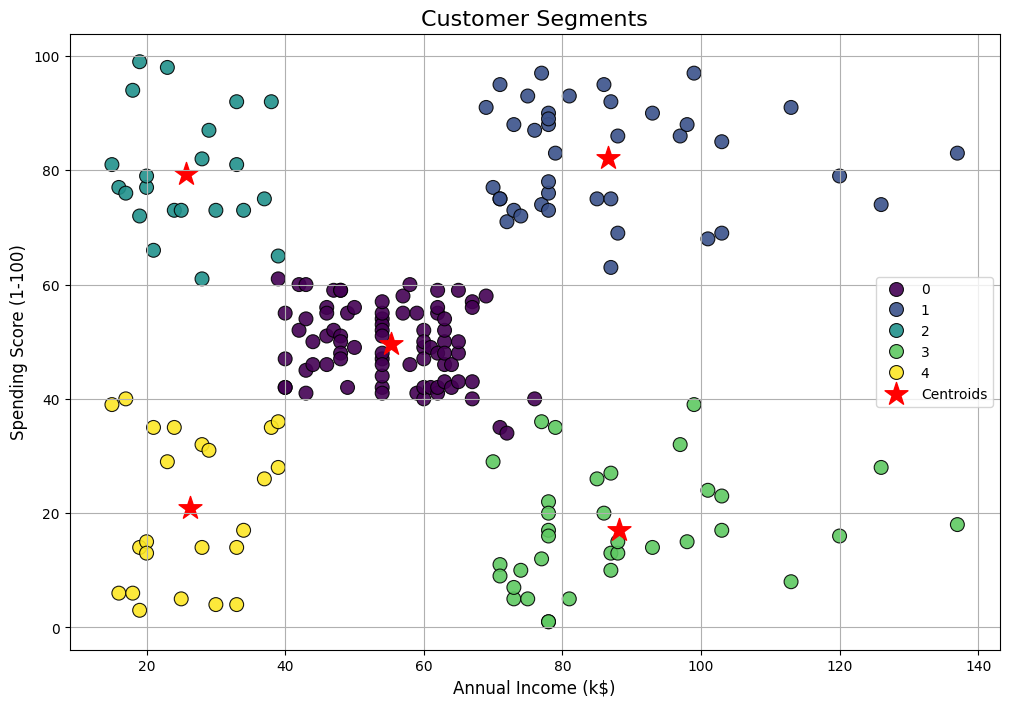


                TASK COMPLETE



In [6]:
# Section 5: Final Model Training and Visualization

print("\n" + "="*50)
print(" " * 8, "FINAL K-MEANS CLUSTERING (k=5)")
print("="*50 + "\n")

# The optimal number of clusters determined from the Elbow Method
OPTIMAL_K = 5

# 1. Train the final K-Means model
kmeans_final = KMeans(n_clusters=OPTIMAL_K, n_init='auto', random_state=42)
kmeans_final.fit(scaled_df)

# Get the cluster labels for each customer
cluster_labels = kmeans_final.labels_

print(f"Step 1: Successfully trained the final K-Means model with k={OPTIMAL_K}.")

# 2. Add the cluster labels back to the original DataFrame
# This is crucial for interpreting the clusters later on.
df['Cluster'] = cluster_labels

print("Step 2: Added the cluster labels to the original DataFrame.\n")
print("Data with cluster assignments (first 5 rows):")
print(df.head())


# 3. Visualize the customer segments
print("\nStep 3: Generating the final customer segmentation plot...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis', # 'viridis' is a visually appealing color map
    s=100, # Set the size of the points
    alpha=0.9, # Set the transparency of the points
    edgecolor='k'
)

# Plot the centroids (the center of each cluster)
centroids = kmeans_final.cluster_centers_

# We need to inverse_transform the centroids to plot them on the original scale
original_centroids = scaler.inverse_transform(centroids)

plt.scatter(
    original_centroids[:, 0],
    original_centroids[:, 1],
    s=300, # Make centroids larger
    c='red',
    marker='*', # Use a star marker for centroids
    label='Centroids'
)

plt.title('Customer Segments', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print("\n" + "="*50)
print(" " * 15, "TASK COMPLETE")
print("="*50 + "\n")



      BONUS 1: SEGMENT PROFILING & ANALYSIS

--- Full Customer Segment Profiles ---
         Number_of_Customers        Age  Annual Income (k$)  \
Cluster                                                       
0                         81  42.716049           55.296296   
1                         39  32.692308           86.538462   
2                         22  25.272727           25.727273   
3                         35  41.114286           88.200000   
4                         23  45.217391           26.304348   

         Spending Score (1-100)  
Cluster                          
0                     49.518519  
1                     82.128205  
2                     79.363636  
3                     17.114286  
4                     20.913043  

Generating bar chart for average spending scores...


C:\Users\HP\AppData\Local\Temp\ipykernel_9464\1722443689.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


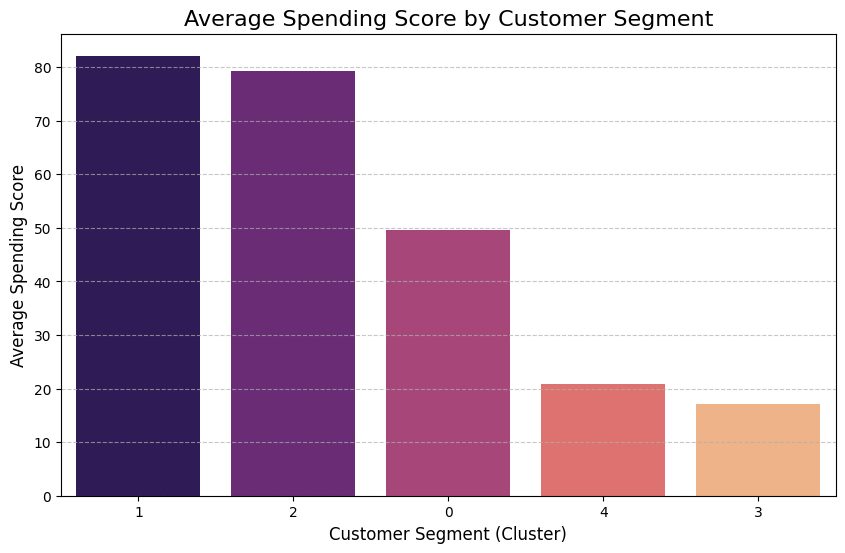


--- Interpreting the Segments ---
Based on the full profiles, we can create personas for each cluster:
 - Cluster with HIGHEST Spending Score: 'PRIME / TARGET'
 - Cluster with LOW Income but HIGH Spending Score: 'YOUNG & RECKLESS / SPENDER'
 - Cluster with MEDIUM Income & Spending Score: 'STANDARD / AVERAGE'
 - Cluster with HIGH Income but LOW Spending Score: 'CAREER-FOCUSED / CAUTIOUS'
 - Cluster with LOWEST Spending Score: 'SAVERS / BUDGET-CONSCIOUS'

(Note: Match the descriptions above to your specific cluster numbers from the table)

             PROFILING COMPLETE



In [10]:
# Section 6 (Upgraded Bonus): Customer Segment Profiling & Spending Analysis

print("\n" + "="*50)
print(" " * 5, "BONUS 1: SEGMENT PROFILING & ANALYSIS")
print("="*50 + "\n")

# --- Part A: Full Cluster Profiling ---
# This part calculates the complete profile for each segment.

# Group by the 'Cluster' column and calculate the mean for the relevant features
cluster_profile = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()

# Add the number of customers in each cluster for context
cluster_profile['Number_of_Customers'] = df['Cluster'].value_counts()

# Re-order columns for a more logical report
cluster_profile = cluster_profile[['Number_of_Customers', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

print("--- Full Customer Segment Profiles ---")
print(cluster_profile)


# --- Part B: Focused Analysis of Average Spending ---
# This part directly addresses the bonus task with a visualization.

# Sort the profiles by spending score to create a ranked chart
spending_sorted_profile = cluster_profile.sort_values(by='Spending Score (1-100)', ascending=False)

print("\nGenerating bar chart for average spending scores...")
plt.figure(figsize=(10, 6))
sns.barplot(
    x=spending_sorted_profile.index,
    y='Spending Score (1-100)',
    data=spending_sorted_profile,
    palette='magma',
    order=spending_sorted_profile.index
)
plt.title('Average Spending Score by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment (Cluster)', fontsize=12)
plt.ylabel('Average Spending Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# --- Part C: Interpretation and Persona Creation ---
# This part uses the data from the table to create actionable personas.

print("\n--- Interpreting the Segments ---")
print("Based on the full profiles, we can create personas for each cluster:")
print(" - Cluster with HIGHEST Spending Score: 'PRIME / TARGET'")
print(" - Cluster with LOW Income but HIGH Spending Score: 'YOUNG & RECKLESS / SPENDER'")
print(" - Cluster with MEDIUM Income & Spending Score: 'STANDARD / AVERAGE'")
print(" - Cluster with HIGH Income but LOW Spending Score: 'CAREER-FOCUSED / CAUTIOUS'")
print(" - Cluster with LOWEST Spending Score: 'SAVERS / BUDGET-CONSCIOUS'")
print("\n(Note: Match the descriptions above to your specific cluster numbers from the table)")


print("\n" + "="*50)
print(" " * 12, "PROFILING COMPLETE")
print("="*50 + "\n")


         BONUS 2: CLUSTERING WITH DBSCAN

Step 1: Ran DBSCAN and assigned new cluster labels.
   - DBSCAN discovered 2 clusters.
   - DBSCAN identified 8 noise points (outliers).

Step 2: Generating the DBSCAN segmentation plot...


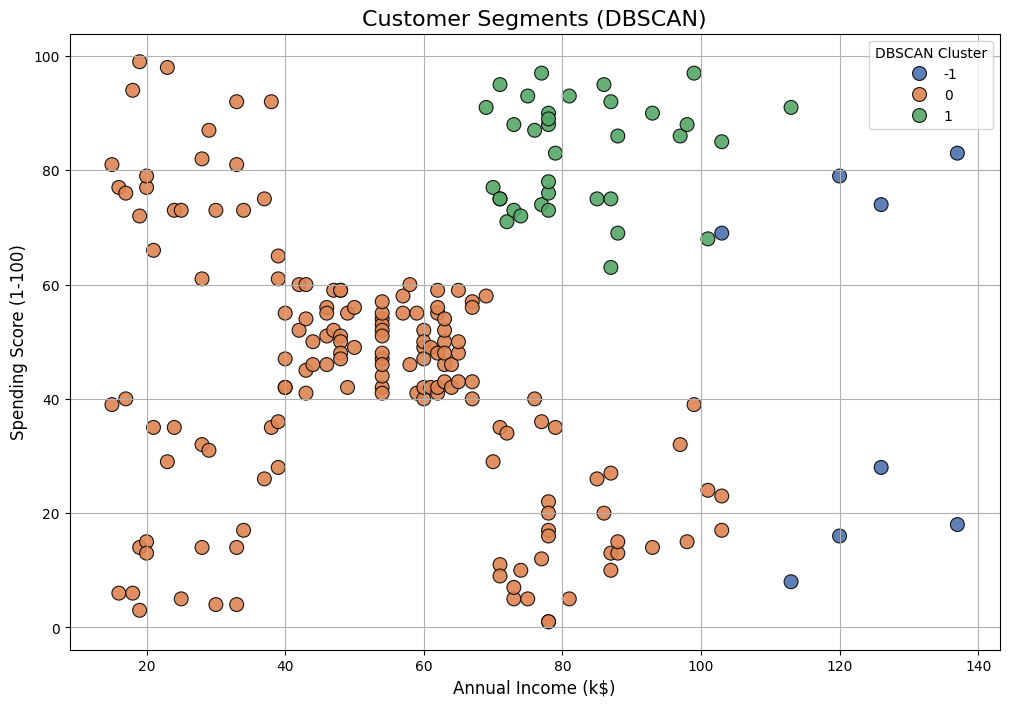


--- Comparison & Conclusion ---
Compare the DBSCAN plot to the K-Means plot.
DBSCAN may find a different number of clusters and identify outliers,
providing a different but equally valuable perspective on the data's structure.

                PROJECT COMPLETE



In [9]:
# Section 7 (Bonus): Clustering with DBSCAN

from sklearn.cluster import DBSCAN

print("\n" + "="*50)
print(" " * 8, "BONUS 2: CLUSTERING WITH DBSCAN")
print("="*50 + "\n")

# 1. Run the DBSCAN algorithm
# The parameters `eps` and `min_samples` are crucial. These values often require
# some experimentation. For this scaled dataset, these are common starting points.
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Add the DBSCAN cluster labels to our dataframe
# Note: DBSCAN uses -1 to label noise points (outliers).
df['DBSCAN_Cluster'] = dbscan_labels

print("Step 1: Ran DBSCAN and assigned new cluster labels.")
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_noise = list(dbscan_labels).count(-1)
print(f"   - DBSCAN discovered {num_clusters} clusters.")
print(f"   - DBSCAN identified {num_noise} noise points (outliers).\n")


# 2. Visualize the DBSCAN clustering results
print("Step 2: Generating the DBSCAN segmentation plot...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    data=df,
    palette='deep', # Using a different palette to distinguish from K-Means
    s=100,
    alpha=0.9,
    edgecolor='k'
)

plt.title('Customer Segments (DBSCAN)', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='DBSCAN Cluster')
plt.grid(True)
plt.show()

print("\n--- Comparison & Conclusion ---")
print("Compare the DBSCAN plot to the K-Means plot.")
print("DBSCAN may find a different number of clusters and identify outliers,")
print("providing a different but equally valuable perspective on the data's structure.")

print("\n" + "="*50)
print(" " * 15, "PROJECT COMPLETE")
print("="*50 + "\n")

This project successfully segmented mall customers using two distinct unsupervised learning algorithms, K-Means and DBSCAN, to uncover actionable business insights. The initial analysis using the Elbow Method identified five as the optimal number of clusters for a K-Means approach. This resulted in five clear customer personas: a high-value 'Target' group (high income, high spending), a 'Standard' middle-ground group, a frugal 'Saver' group (low income, low spending), a financially-cautious 'Career-Focused' group (high income, low spending), and a potential-rich 'Spender' group (low income, high spending).
To validate this structure, a density-based DBSCAN model was also applied. This alternative approach revealed a different but equally important insight: the customer base is naturally composed of two large, dense super-clusters and a small but significant group of high-income outliers. By combining the findings of both models, we gain a comprehensive understanding: while the customer base can be practically divided into five marketing segments, it is structurally dominated by a large mainstream population, with a distinct high-spending segment and a few outlier customers whose unique behavior warrants special attention.